# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Nearest city for each lat, lng mix
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    city_url = url + "&q=" + city
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"City":city,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
        print(f'Processing... {city}')
    except:
        print("city not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("--------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
------------------------
Processing... huty
Processing... kahului
Processing... kaitangata
Processing... naliya
Processing... honiara
Processing... albany
Processing... cape town
city not found. Skipping...
Processing... matay
Processing... jamestown
Processing... sitka
Processing... anajatuba
Processing... wenling
Processing... cherskiy
Processing... yellowknife
Processing... tuktoyaktuk
Processing... flinders
city not found. Skipping...
Processing... hobart
Processing... lagoa
Processing... qaanaaq
Processing... chaozhou
Processing... punta arenas
Processing... avarua
Processing... san quintin
Processing... port alfred
Processing... moron
Processing... kruisfontein
Processing... aras
Processing... bluff
Processing... bethel
Processing... marawi
Processing... labuhan
Processing... rikitea
Processing... powell river
Processing... hirado
Processing... yaan
Processing... castro
Processing... talnakh
Processing... sorland
Processing... mokhsogollokh
Processing... 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(city_data)

weather_df = weather_df[["City","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
weather_df.head()

pd.DataFrame.to_csv(weather_df, "weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [6]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

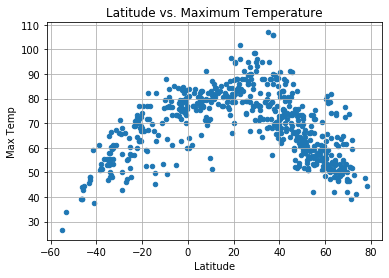

In [9]:
weather_df.plot(x="Latitude",y="Max Temp",kind ="scatter",title="Latitude vs. Maximum Temperature",grid = True)
plt.show()

## Latitude vs. Humidity Plot

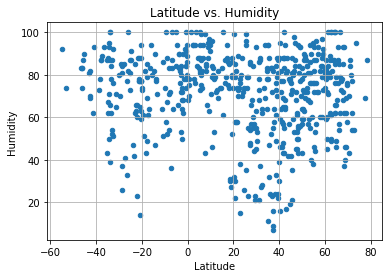

In [8]:
weather_df.plot(x="Latitude",y="Humidity",kind ="scatter",title="Latitude vs. Humidity",grid = True)
plt.show()

## Latitude vs. Cloudiness Plot

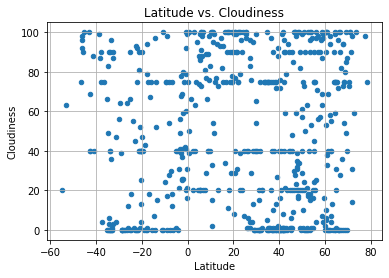

In [10]:
weather_df.plot(x="Latitude",y="Cloudiness",kind ="scatter",title="Latitude vs. Cloudiness",grid = True)
plt.show()

## Latitude vs. Wind Speed Plot

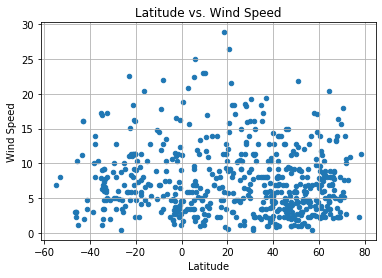

In [11]:
weather_df.plot(x="Latitude",y="Wind Speed",kind ="scatter",title="Latitude vs. Wind Speed",grid = True)
plt.show()

## Linear Regression

In [7]:
# OPTIONAL: Create a function to create Linear Regression plots

In [8]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression